In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

In [2]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosRG.csv')
data

0         1         2         3         4         5         6  \
0      0.567933  0.468963  0.418387  0.397268  0.366222  0.314062  0.305755   
1      0.357207  0.312090  0.266491  0.252556  0.274381  0.292628  0.282017   
2      0.312563  0.307927  0.255154  0.212121  0.208340  0.222300  0.231618   
3      0.296776  0.307322  0.277153  0.242500  0.254109  0.283406  0.277839   
4      0.244860  0.183807  0.154699  0.148348  0.149485  0.151795  0.160408   
...         ...       ...       ...       ...       ...       ...       ...   
12116  0.110724  0.117143  0.108315  0.094340  0.095868  0.113917  0.128631   
12117  0.123169  0.056995  0.075046  0.085722  0.073361  0.089574  0.134921   
12118  0.149852  0.098694  0.087556  0.092886  0.097180  0.102063  0.106407   
12119  0.232100  0.166834  0.098958  0.090816  0.123015  0.141063  0.122684   
12120  0.243073  0.200749  0.192990  0.189484  0.179124  0.172621  0.180113   

              7         8         9  ...       334       335       336  \
0      0.396973  0.528640  0.530481  ...  0.553042  0.550603  0.541435   
1      0.257519  0.260231  0.286517  ...  0.593430  0.588292  0.572961   
2      0.234574  0.245502  0.252881  ...  0.621034  0.616308  0.600225   
3      0.244421  0.252737  0.305865  ...  0.607069  0.608714  0.599235   
4      0.173335  0.185585  0.187322  ...  0.720240  0.723352  0.713522   
...         ...       ...       ...  ...       ...       ...       ...   
12116  0.120617  0.103777  0.103601  ...  0.904124  0.903131  0.884643   
12117  0.136902  0.083655  0.069436  ...  0.914451  0.924044  0.919261   
12118  0.091439  0.060448  0.054961  ...  0.949209  0.963151  0.959169   
12119  0.100418  0.125119  0.179554  ...  0.909980  0.926298  0.928572   
12120  0.184541  0.172980  0.157746  ...  0.780299  0.786672  0.782953   

            337       338       339       340       341       342  id  
0      0.543974  0.556192  0.566876  0.602345  0.627477  0.676326   3  
1      0.566345  0.565697  0.559901  0.575898  0.581218  0.610140   3  
2      0.592773  0.591315  0.584525  0.600805  0.606444  0.637230   3  
3      0.597644  0.600575  0.595629  0.610977  0.611923  0.634690   3  
4      0.713116  0.717857  0.712581  0.730649  0.730299  0.754630   3  
...         ...       ...       ...       ...       ...       ...  ..  
12116  0.877637  0.877998  0.868636  0.891624  0.897031  0.938228   3  
12117  0.927998  0.943784  0.945054  0.974174  0.973854  1.000000   3  
12118  0.965922  0.976643  0.969675  0.989756  0.980251  1.000000   3  
12119  0.943763  0.964274  0.966858  0.993788  0.985947  1.000000   3  
12120  0.792973  0.811207  0.818890  0.852398  0.861424  0.894761   3  

[12121 rows x 344 columns]

In [3]:
df_data = pd.DataFrame(data)

In [4]:
data_t =  data.T

In [5]:
data_t

0         1         2         3         4         5         6      \
0    0.567933  0.357207  0.312563  0.296776  0.244860  0.350586  0.287251   
1    0.468963  0.312090  0.307927  0.307322  0.183807  0.336300  0.104099   
2    0.418387  0.266491  0.255154  0.277153  0.154699  0.309237  0.104618   
3    0.397268  0.252556  0.212121  0.242500  0.148348  0.307617  0.235937   
4    0.366222  0.274381  0.208340  0.254109  0.149485  0.335980  0.344171   
..        ...       ...       ...       ...       ...       ...       ...   
339  0.566876  0.559901  0.584525  0.595629  0.712581  0.569089  0.668886   
340  0.602345  0.575898  0.600805  0.610977  0.730649  0.581146  0.677691   
341  0.627477  0.581218  0.606444  0.611923  0.730299  0.585907  0.675752   
342  0.676326  0.610140  0.637230  0.634690  0.754630  0.618420  0.705150   
id   3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   

        7         8         9      ...     12111     12112     12113  \
0    0.216728  0.271050  0.343475  ...  0.073647  0.294543  0.228736   
1    0.192897  0.249572  0.323105  ...  0.047541  0.245175  0.261757   
2    0.173718  0.303283  0.276764  ...  0.057108  0.194670  0.286758   
3    0.168887  0.343315  0.248043  ...  0.062392  0.203087  0.243508   
4    0.172591  0.342420  0.257685  ...  0.056868  0.234018  0.195193   
..        ...       ...       ...  ...       ...       ...       ...   
339  0.709209  0.635406  0.632324  ...  0.927872  0.700428  0.625857   
340  0.730824  0.674621  0.651088  ...  0.960252  0.711903  0.647480   
341  0.732848  0.692625  0.653213  ...  0.965770  0.698703  0.660524   
342  0.757787  0.727339  0.676759  ...  1.000000  0.702311  0.703410   
id   3.000000  3.000000  3.000000  ...  3.000000  3.000000  3.000000   

        12114     12115     12116     12117     12118     12119     12120  
0    0.150298  0.110549  0.110724  0.123169  0.149852  0.232100  0.243073  
1    0.101963  0.069216  0.117143  0.056995  0.098694  0.166834  0.200749  
2    0.330792  0.093381  0.108315  0.075046  0.087556  0.098958  0.192990  
3    0.400448  0.137289  0.094340  0.085722  0.092886  0.090816  0.189484  
4    0.061029  0.138639  0.095868  0.073361  0.097180  0.123015  0.179124  
..        ...       ...       ...       ...       ...       ...       ...  
339  0.917894  0.942603  0.868636  0.945054  0.969675  0.966858  0.818890  
340  0.871701  0.975971  0.891624  0.974174  0.989756  0.993788  0.852398  
341  0.750848  0.976396  0.897031  0.973854  0.980251  0.985947  0.861424  
342  0.605834  1.000000  0.938228  1.000000  1.000000  1.000000  0.894761  
id   3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  

[344 rows x 12121 columns]

In [6]:
data_t =  data_t.drop(labels='id', axis=0)
data.drop(columns='id', inplace=True)

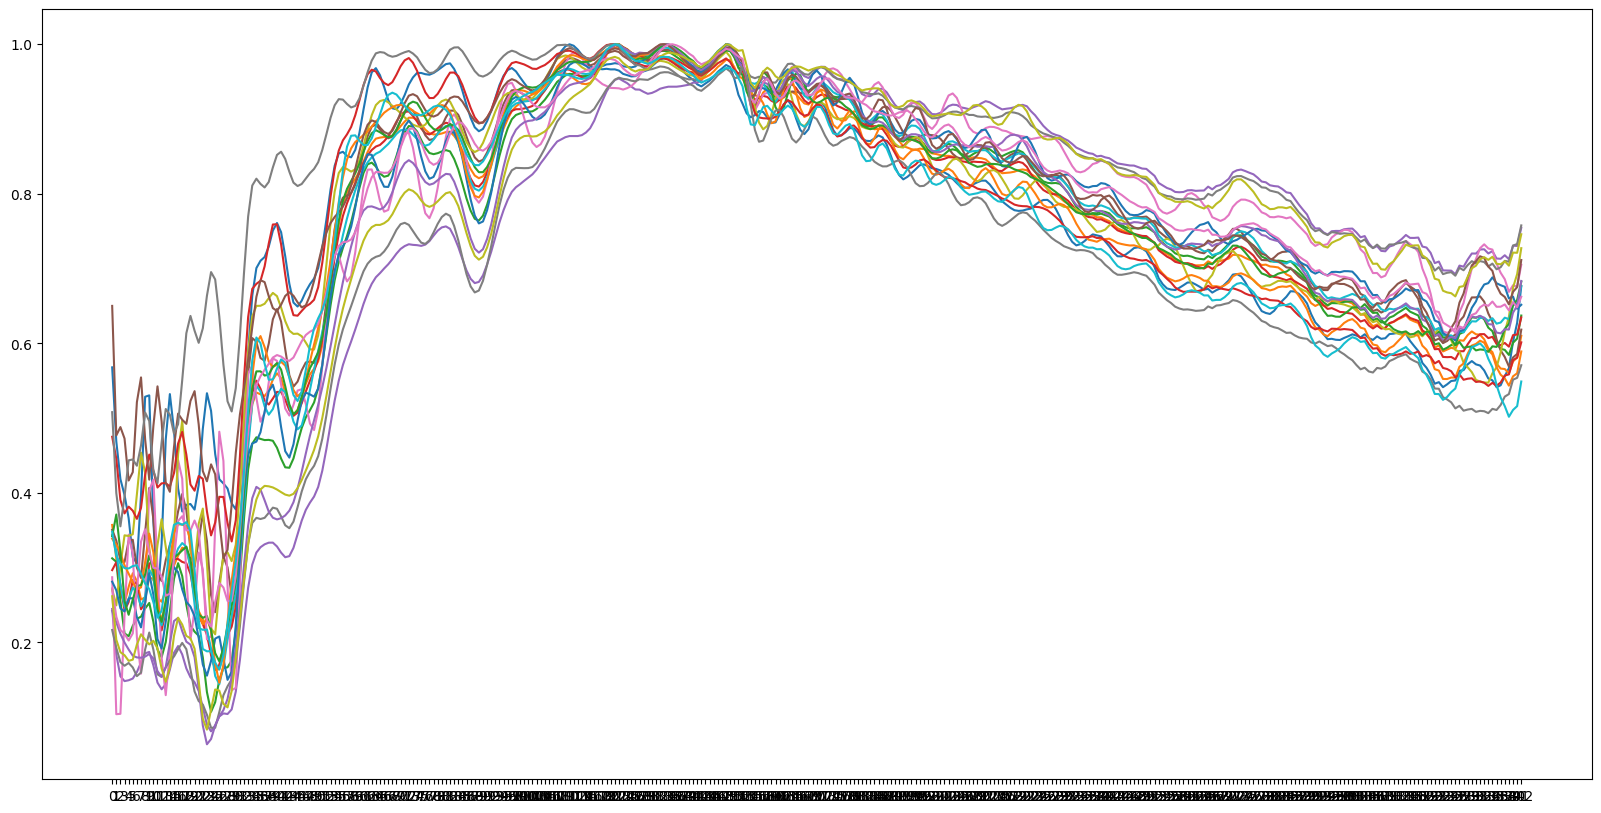

In [7]:
plt.figure(figsize=(20,10))
plt.plot(data_t.iloc[:, 0:20])

n_components = 1
Explained variance ratio: 0.78907
n_components = 2
Explained variance ratio: 0.97151
n_components = 3
Explained variance ratio: 0.98126
n_components = 4
Explained variance ratio: 0.98392
n_components = 5
Explained variance ratio: 0.98592
n_components = 6
Explained variance ratio: 0.98701
n_components = 7
Explained variance ratio: 0.98802
n_components = 8
Explained variance ratio: 0.98895
n_components = 9
Explained variance ratio: 0.98972
n_components = 10
Explained variance ratio: 0.99039
n_components = 11
Explained variance ratio: 0.99093
n_components = 12
Explained variance ratio: 0.99145
n_components = 13
Explained variance ratio: 0.99193
n_components = 14
Explained variance ratio: 0.99238
n_components = 15
Explained variance ratio: 0.99280
n_components = 16
Explained variance ratio: 0.99317
n_components = 17
Explained variance ratio: 0.99354
n_components = 18
Explained variance ratio: 0.99385
n_components = 19
Explained variance ratio: 0.99416
n_components = 20
Exp

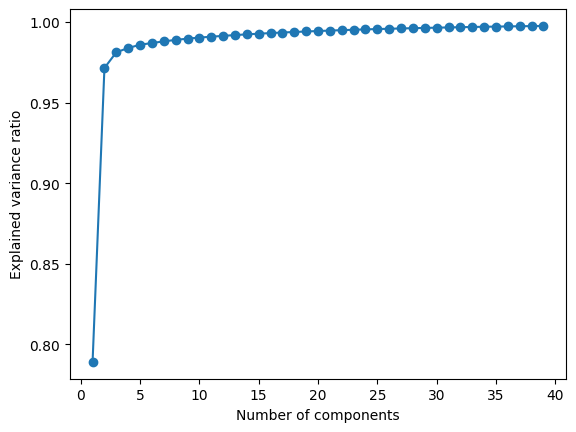

In [8]:
# assume that `data` contains your data
data = df_data.copy()
explained_variances = []
for n_components in range(1, 40):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.5f}")

# plot the explained variance ratio as a function of the number of components
import matplotlib.pyplot as plt
plt.plot(range(1, 40), explained_variances, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()


In [9]:
data = df_data.copy()
explained_variances = []
for n_components in range(1, 41):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.6f}")

n_components = 1
Explained variance ratio: 0.789067
n_components = 2
Explained variance ratio: 0.971506
n_components = 3
Explained variance ratio: 0.981258
n_components = 4
Explained variance ratio: 0.983918
n_components = 5
Explained variance ratio: 0.985925
n_components = 6
Explained variance ratio: 0.987008
n_components = 7
Explained variance ratio: 0.988017
n_components = 8
Explained variance ratio: 0.988948
n_components = 9
Explained variance ratio: 0.989720
n_components = 10
Explained variance ratio: 0.990390
n_components = 11
Explained variance ratio: 0.990927
n_components = 12
Explained variance ratio: 0.991448
n_components = 13
Explained variance ratio: 0.991934
n_components = 14
Explained variance ratio: 0.992380
n_components = 15
Explained variance ratio: 0.992797
n_components = 16
Explained variance ratio: 0.993174
n_components = 17
Explained variance ratio: 0.993535
n_components = 18
Explained variance ratio: 0.993854
n_components = 19
Explained variance ratio: 0.994163
n_

In [10]:
pca = PCA()
pipeline = Pipeline(steps=[('pca', pca)])

param_grid = {
    'pca__n_components': np.arange(10,80),
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)

grid_search.fit(data)
best_params = grid_search.best_params_

best_pca = PCA(n_components=best_params['pca__n_components'], svd_solver=best_params['pca__svd_solver'])
new_pipeline = Pipeline(steps=[('pca', best_pca)])
new_pipeline.fit(data)
print(new_pipeline.named_steps['pca'])


PCA(n_components=79, svd_solver='arpack')


In [11]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=30, svd_solver='arpack')
pca_transformed = pca_data.fit_transform(data)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [12]:
pca_transformed_data

0         1         2         3         4         5         6   \
0     -3.528263  2.043855  0.514632  0.007193 -0.067363 -0.067135 -0.045164   
1     -3.062377  1.119220 -0.289263 -0.073837  0.111209 -0.028907  0.033954   
2     -2.866415  0.772834 -0.544723 -0.043958  0.107195  0.005224 -0.019854   
3     -3.039459  1.095839 -0.332399 -0.094895  0.040900  0.007710  0.042730   
4     -2.034878 -0.593843 -0.476006  0.072556  0.039323  0.024413  0.013112   
...         ...       ...       ...       ...       ...       ...       ...   
12116 -1.043247 -2.108894 -0.099136 -0.009556  0.029086  0.109398 -0.010653   
12117  1.380832 -1.509905  0.245890 -0.047145 -0.019702 -0.018711  0.095543   
12118  1.027746 -1.921720  0.176561 -0.023060 -0.057617  0.041959 -0.025475   
12119  0.328277 -1.709200  0.340565 -0.117496 -0.100249 -0.010388  0.021795   
12120 -2.061402 -1.155229 -0.133030 -0.090602 -0.093051  0.024222  0.043244   

             7         8         9   ...        20        21        22  \
0      0.125172 -0.110641  0.001837  ... -0.051076 -0.043243 -0.044104   
1      0.033476 -0.048838  0.051719  ... -0.032341  0.004806  0.003622   
2     -0.054689 -0.016427  0.028858  ...  0.006165  0.002117  0.019217   
3      0.032647 -0.000275  0.051886  ... -0.004023 -0.044481  0.022996   
4     -0.034853  0.016273  0.030980  ...  0.004728 -0.001727  0.038107   
...         ...       ...       ...  ...       ...       ...       ...   
12116 -0.015191  0.070965 -0.065627  ... -0.013506 -0.007628 -0.021169   
12117 -0.104130 -0.013669 -0.001600  ... -0.039764  0.052775 -0.006637   
12118 -0.048506  0.001386  0.000221  ... -0.002611  0.061756 -0.015837   
12119  0.049149 -0.131568  0.043159  ... -0.030770  0.044951  0.023076   
12120 -0.058644 -0.064417 -0.097114  ...  0.024322  0.027559 -0.023323   

             23        24        25        26        27        28        29  
0      0.110736 -0.040355  0.005658 -0.070817 -0.026028 -0.059648 -0.060645  
1      0.013816  0.026634 -0.055633  0.024705  0.016446 -0.012820  0.019634  
2     -0.004702 -0.002952 -0.016241  0.016987 -0.016964 -0.014582  0.007189  
3      0.005222  0.026092 -0.016036  0.001991 -0.015612 -0.013532  0.000043  
4      0.001692 -0.012277 -0.050647  0.005648  0.030082 -0.021340  0.010241  
...         ...       ...       ...       ...       ...       ...       ...  
12116 -0.020481  0.044309  0.005553 -0.003370  0.010911 -0.003097  0.021691  
12117 -0.029296  0.051424  0.037921 -0.049112 -0.009030  0.011000 -0.019459  
12118  0.019691  0.015678 -0.027697  0.003616  0.004313 -0.063050  0.004217  
12119 -0.030308  0.010648 -0.002903 -0.027912  0.024026  0.009051 -0.004268  
12120  0.000956 -0.042839 -0.018975  0.004330  0.003320 -0.027972  0.015409  

[12121 rows x 30 columns]

In [13]:
pca_transformed_data.shape

(12121, 30)

In [14]:
pca_transformed_data_t = pca_transformed_data.T

In [15]:
pca_transformed_data_t

0         1         2         3         4         5         6      \
0  -3.528263 -3.062377 -2.866415 -3.039459 -2.034878 -3.295217 -2.972411   
1   2.043855  1.119220  0.772834  1.095839 -0.593843  1.034236  0.298219   
2   0.514632 -0.289263 -0.544723 -0.332399 -0.476006  0.185270  0.238448   
3   0.007193 -0.073837 -0.043958 -0.094895  0.072556 -0.082595 -0.109912   
4  -0.067363  0.111209  0.107195  0.040900  0.039323  0.129582  0.037111   
5  -0.067135 -0.028907  0.005224  0.007710  0.024413 -0.086638 -0.121613   
6  -0.045164  0.033954 -0.019854  0.042730  0.013112 -0.082262 -0.085541   
7   0.125172  0.033476 -0.054689  0.032647 -0.034853  0.031923 -0.269425   
8  -0.110641 -0.048838 -0.016427 -0.000275  0.016273  0.026539  0.202857   
9   0.001837  0.051719  0.028858  0.051886  0.030980  0.009707  0.129640   
10 -0.000253 -0.015733 -0.051612 -0.030201  0.037383  0.004222  0.230577   
11 -0.153882  0.021770  0.012358  0.046169 -0.007249 -0.013472 -0.076742   
12  0.054718 -0.027113 -0.031504  0.010480 -0.018777  0.047779  0.138077   
13 -0.013598 -0.012695  0.015069  0.010180 -0.026530  0.024991  0.280398   
14  0.013312 -0.020194 -0.009679 -0.007089  0.013325  0.012710  0.089265   
15 -0.163277  0.021609 -0.029775  0.009764  0.002300  0.049996  0.094222   
16 -0.242176  0.027370 -0.032763 -0.012062 -0.026606 -0.040390  0.015144   
17 -0.003783 -0.034310  0.023947 -0.015121 -0.070796 -0.027022 -0.057087   
18  0.066631 -0.017172 -0.013334 -0.022099  0.000849 -0.006769  0.078151   
19  0.059102 -0.018938  0.012551 -0.001105  0.033590  0.004631  0.128287   
20 -0.051076 -0.032341  0.006165 -0.004023  0.004728 -0.031705  0.021849   
21 -0.043243  0.004806  0.002117 -0.044481 -0.001727 -0.034901 -0.122770   
22 -0.044104  0.003622  0.019217  0.022996  0.038107  0.022765  0.140433   
23  0.110736  0.013816 -0.004702  0.005222  0.001692  0.015954 -0.003581   
24 -0.040355  0.026634 -0.002952  0.026092 -0.012277  0.040787 -0.048606   
25  0.005658 -0.055633 -0.016241 -0.016036 -0.050647  0.023481  0.221776   
26 -0.070817  0.024705  0.016987  0.001991  0.005648  0.041912  0.067182   
27 -0.026028  0.016446 -0.016964 -0.015612  0.030082 -0.008581 -0.066035   
28 -0.059648 -0.012820 -0.014582 -0.013532 -0.021340 -0.003540  0.107374   
29 -0.060645  0.019634  0.007189  0.000043  0.010241 -0.029786 -0.113631   

       7         8         9      ...     12111     12112     12113     12114  \
0  -2.229634 -3.322019 -3.061637  ...  2.621984 -2.659235 -2.749482  0.175615   
1  -0.409798  1.480534  0.833335  ... -1.436818  0.033464  0.088980  0.318106   
2  -0.419852  0.168991 -0.249356  ...  0.123902 -0.275783  0.168419  0.564329   
3  -0.008993 -0.145701 -0.107939  ...  0.098884 -0.059798  0.091213  0.962639   
4   0.025627 -0.164779 -0.005182  ...  0.096457 -0.036528  0.103710 -0.641087   
5  -0.021525 -0.251927  0.031397  ... -0.174286  0.095412  0.008775  0.670513   
6   0.038915  0.066593  0.032208  ...  0.185236  0.100841  0.125694  0.061140   
7   0.002854 -0.023813  0.065208  ...  0.055292  0.012616  0.005826  0.552097   
8   0.027471  0.089047 -0.054311  ... -0.007286 -0.054835  0.090190  0.180814   
9   0.009715 -0.060352  0.031466  ...  0.297034  0.049396 -0.058848 -0.394053   
10  0.006359 -0.071922 -0.031003  ... -0.165343  0.015895  0.116545 -0.153119   
11 -0.024517 -0.015087  0.041700  ...  0.039797 -0.044512  0.037612 -0.002145   
12 -0.017900 -0.115626 -0.030389  ... -0.013395  0.016784 -0.022513  0.024845   
13  0.027085 -0.096495 -0.018185  ...  0.031503  0.053546 -0.040915 -0.119142   
14  0.006084  0.060241  0.028106  ...  0.041240  0.003461 -0.058549  0.287233   
15 -0.017059  0.026953  0.020193  ... -0.166420  0.052098  0.076106  0.118332   
16 -0.005375  0.085482 -0.005217  ...  0.048256  0.021018 -0.104036 -0.095762   
17  0.016497 -0.001393 -0.000306  ... -0.233040  0.021743 -0.139586 -0.382963   
18 -0.009316 -0.016136 -0.018097  ... -0.032572  0.026847 -0.006089 -0.597953   
19  0.021166  0.021451  0.0031

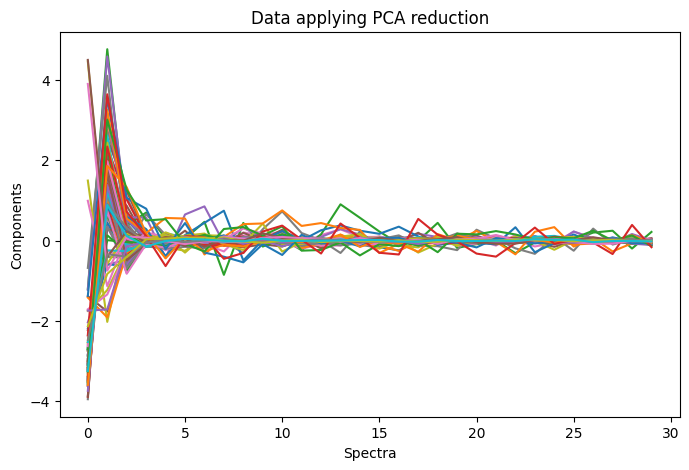

In [16]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Spectra")
plt.ylabel("Components")
plt.plot(pca_transformed_data_t.iloc[:,:100])
plt.show()

In [17]:
original_data = pca_data.inverse_transform(pca_transformed)
original_data

array([[0.5515501 , 0.4822147 , 0.41126998, ..., 0.62780909, 0.67712718,
        3.        ],
       [0.35542204, 0.31642917, 0.26557151, ..., 0.58100938, 0.60808563,
        3.        ],
       [0.31272668, 0.30587992, 0.255198  , ..., 0.60601796, 0.63564483,
        3.        ],
       ...,
       [0.1516437 , 0.09625676, 0.08950861, ..., 0.98353897, 1.00502899,
        3.        ],
       [0.23723926, 0.1521267 , 0.10015155, ..., 0.97906475, 0.99413862,
        3.        ],
       [0.24340536, 0.20139439, 0.19096448, ..., 0.86178455, 0.89440268,
        3.        ]])

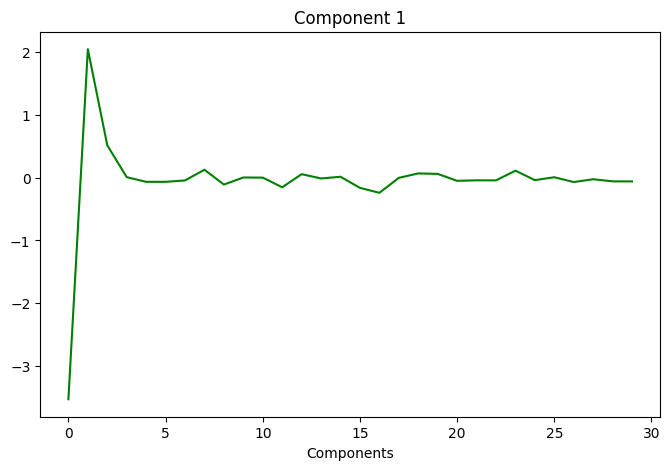

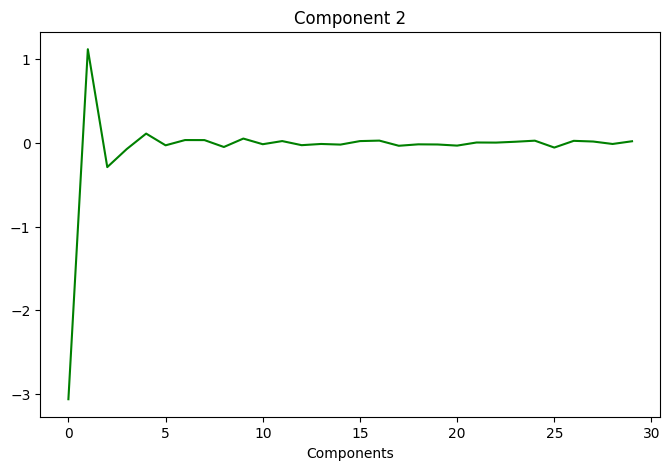

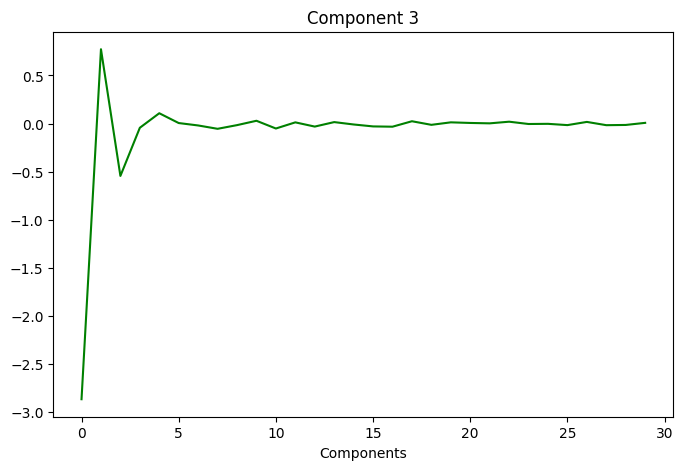

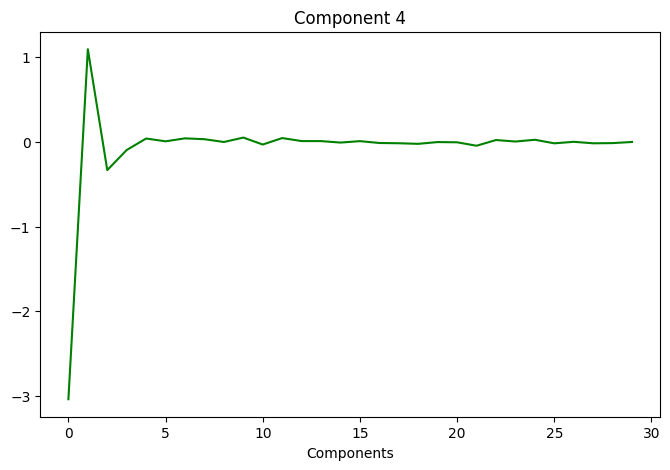

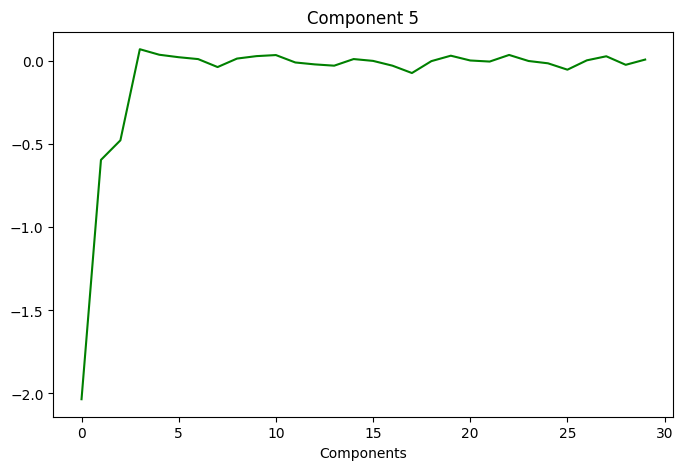

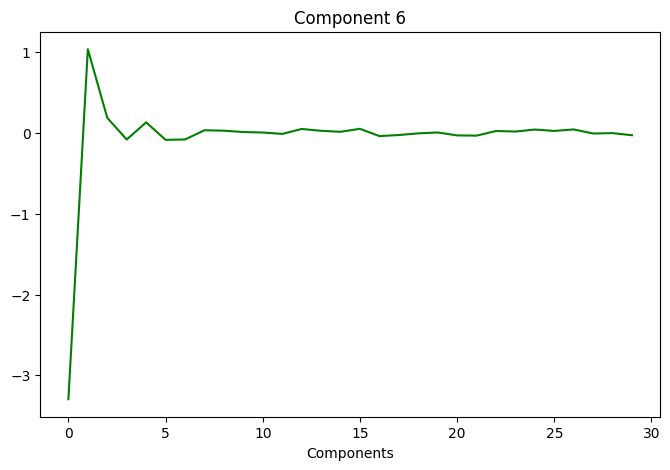

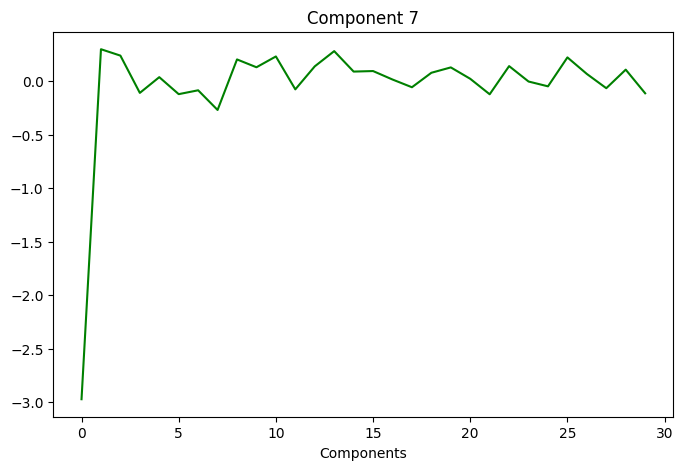

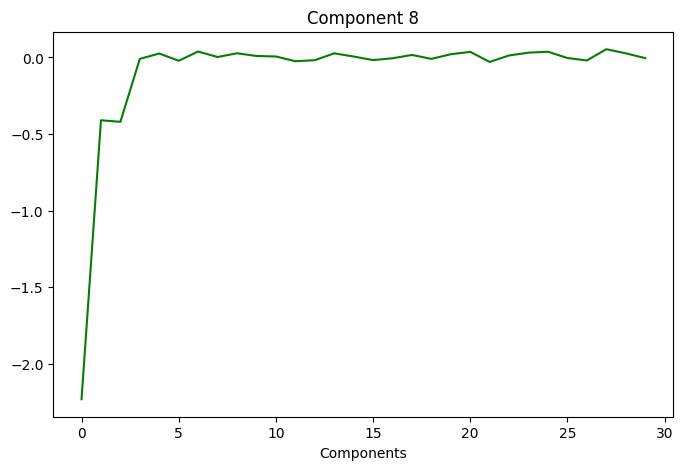

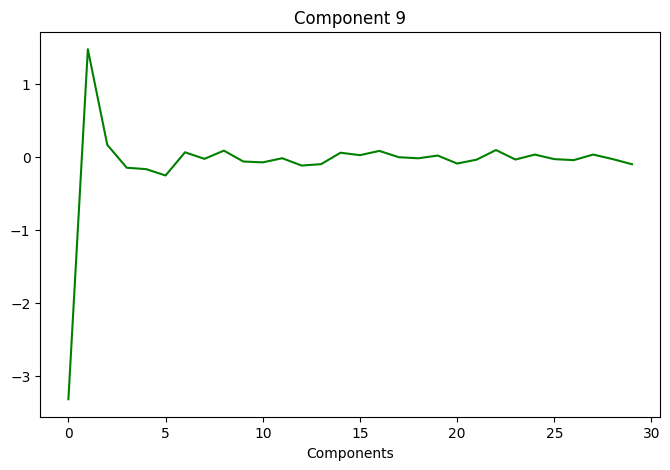

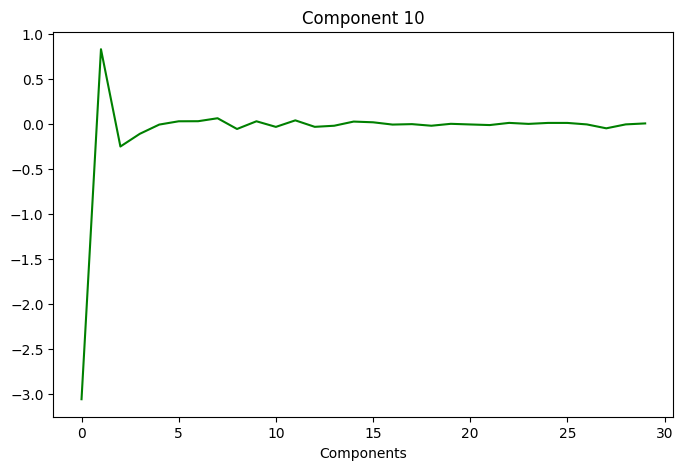

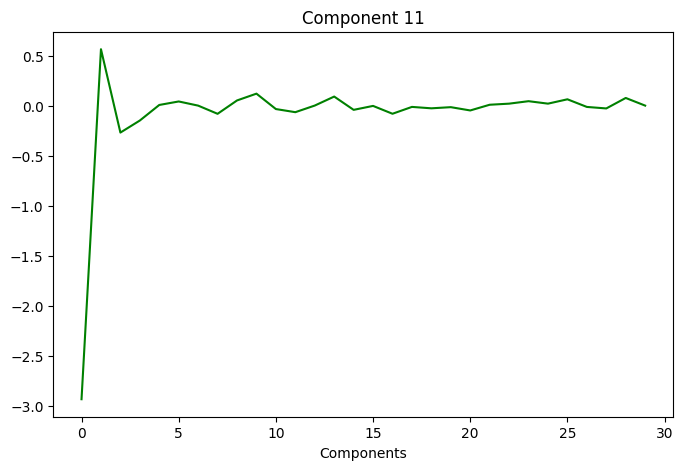

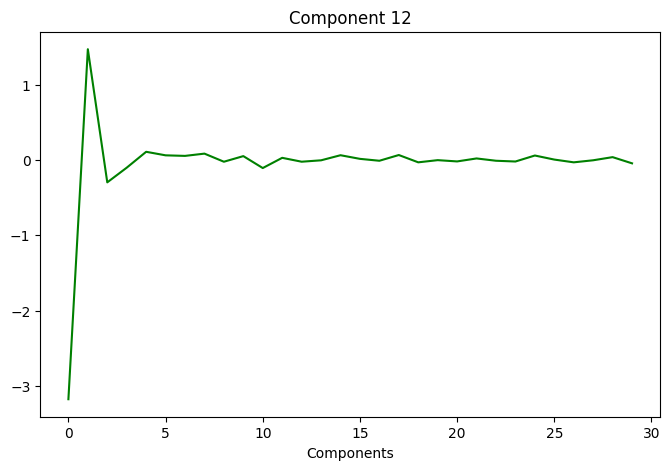

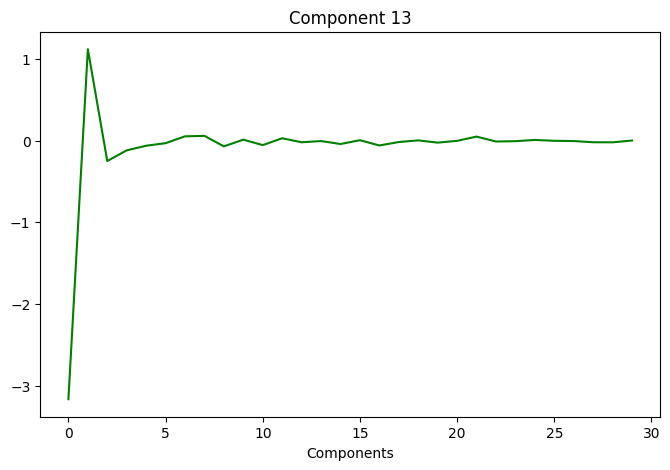

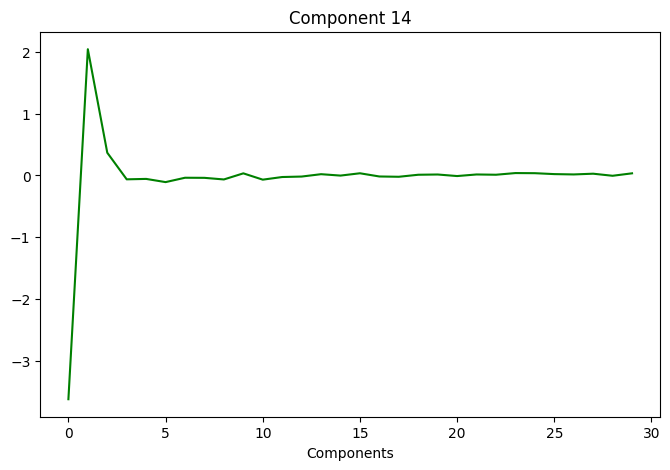

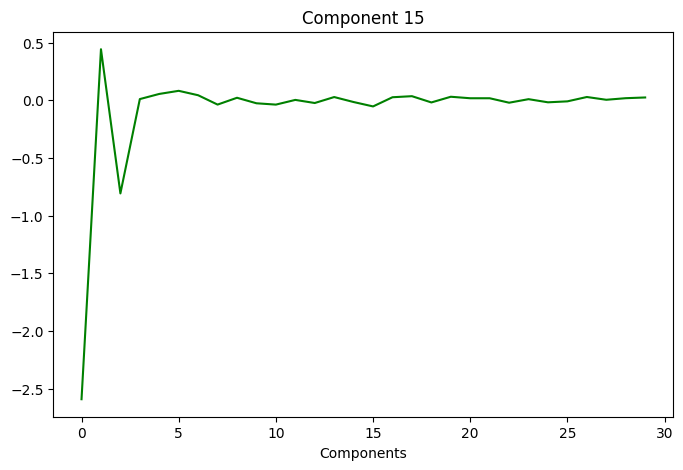

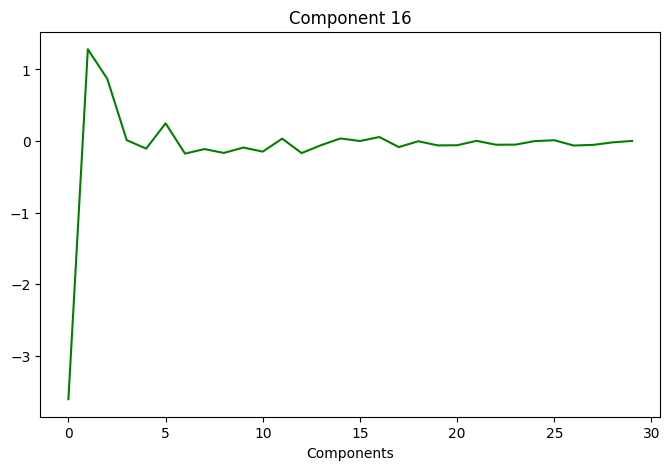

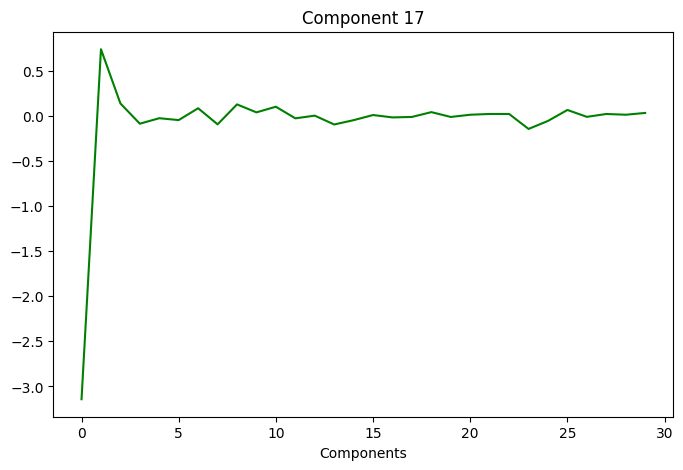

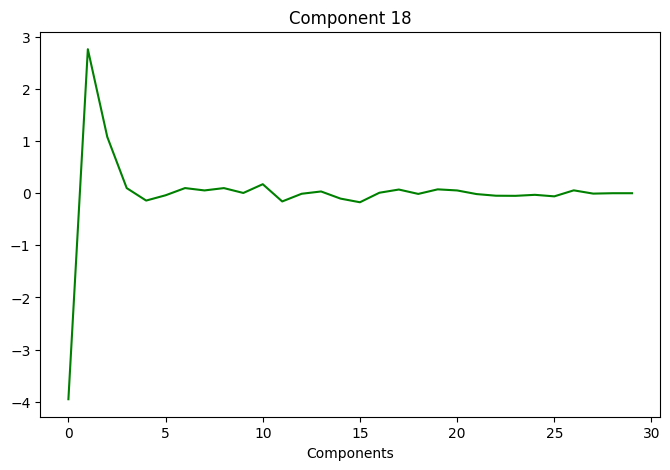

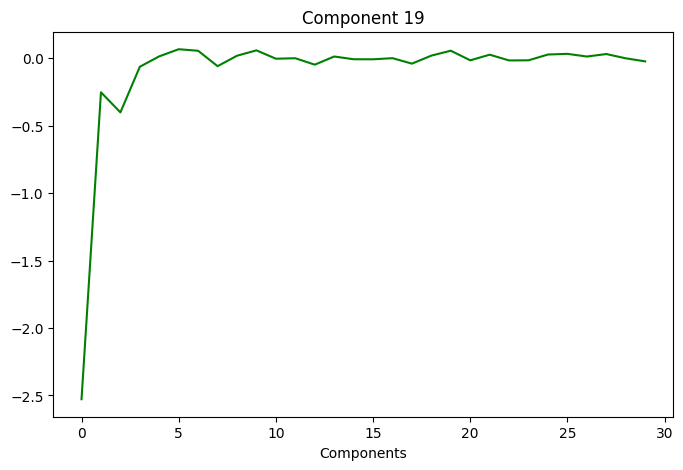

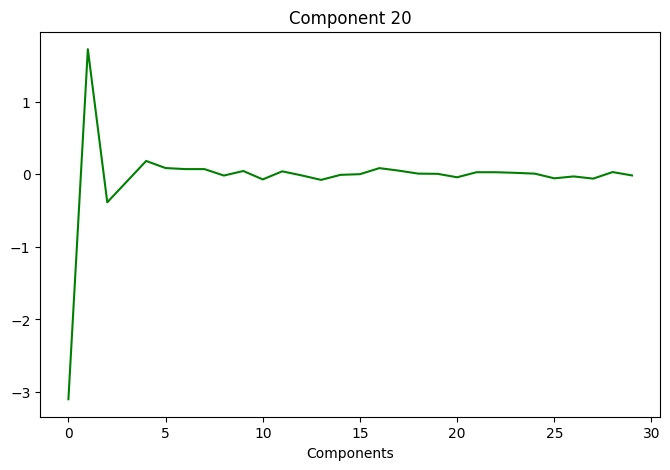

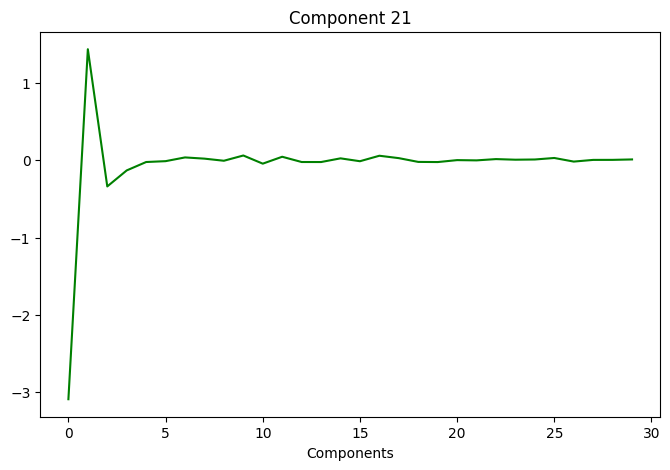

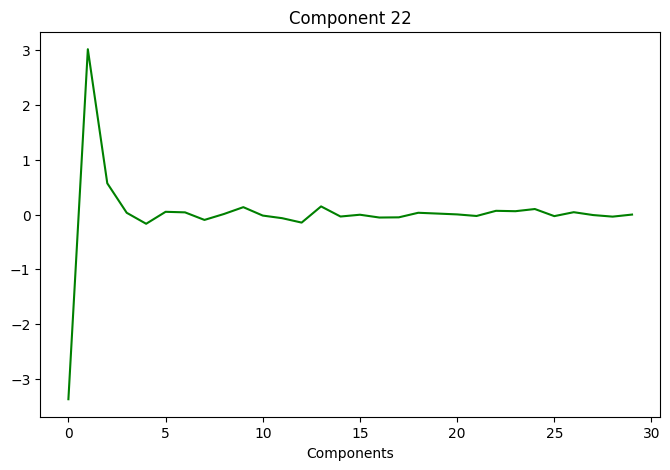

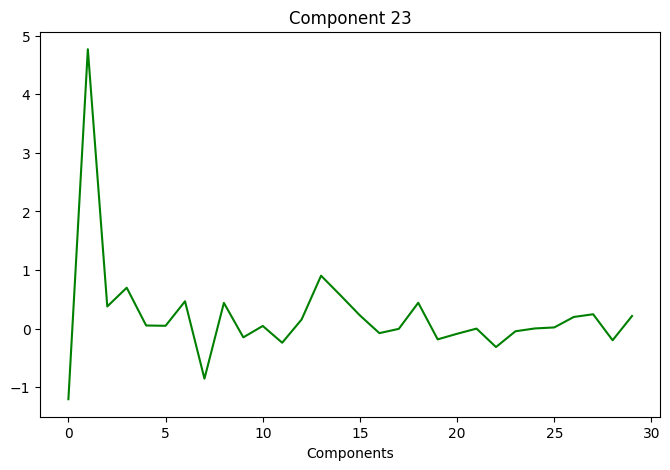

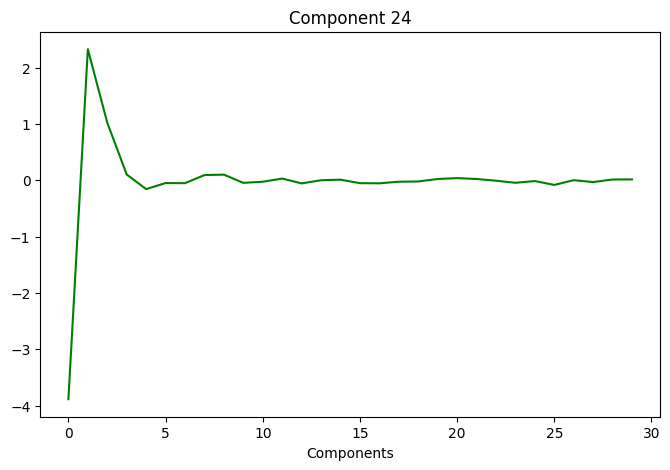

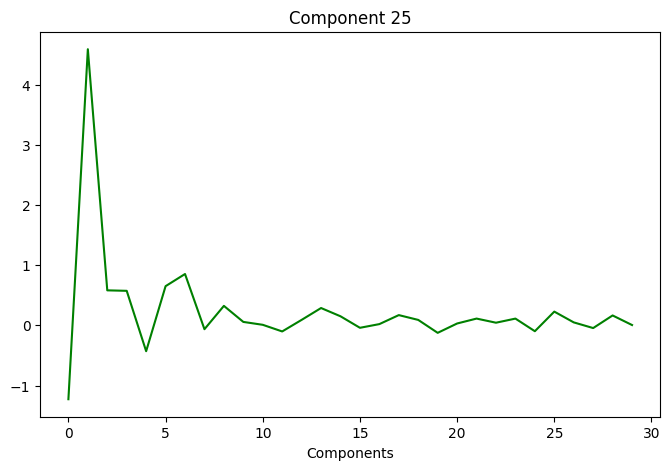

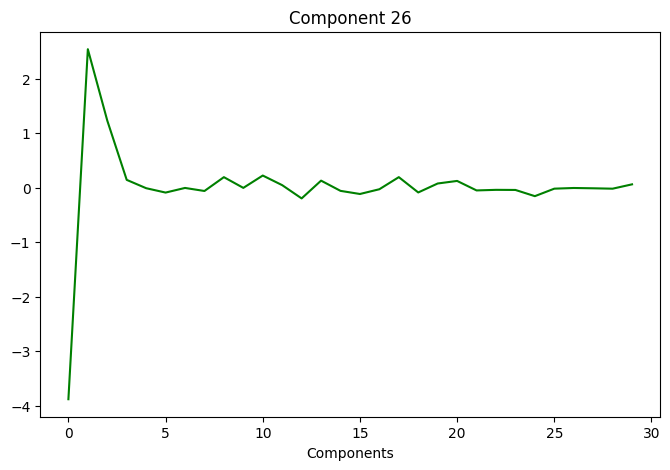

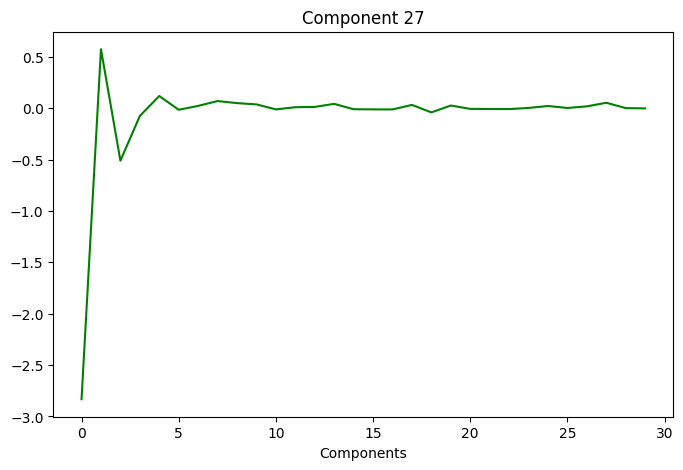

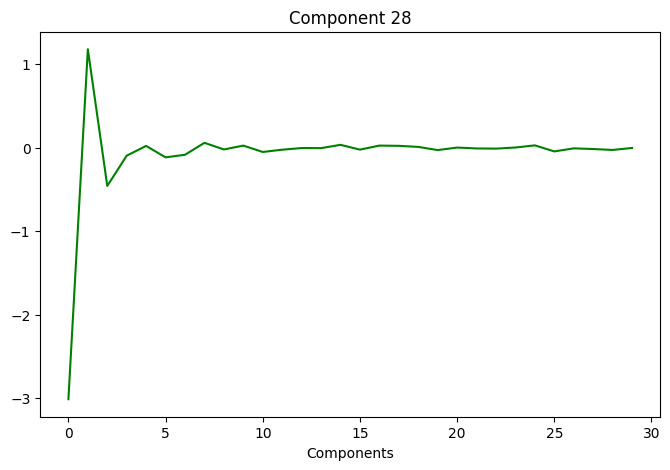

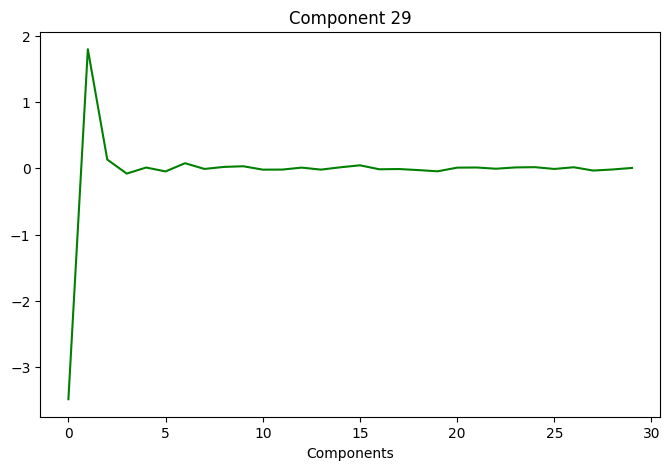

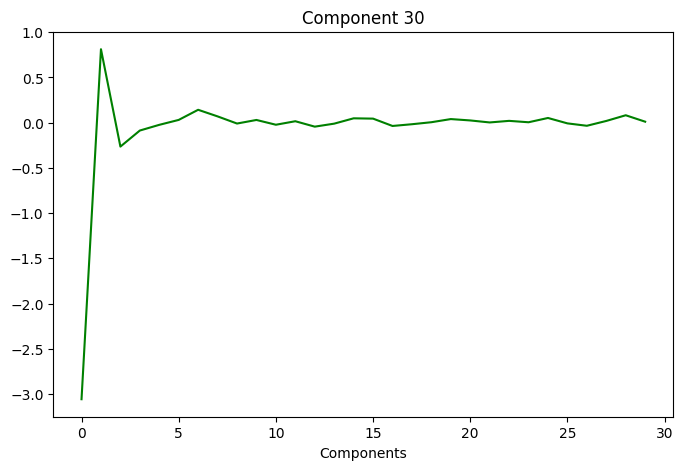

In [18]:
for i in range(1,31):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Components")
    plt.plot(pca_transformed_data_t.iloc[:,i-1:i], '-',markersize=1, color = "g")
    plt.show()

In [19]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=15, n_neighbors=150)
lle_transformed = lle.fit_transform(data)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [20]:
lle_transformed_data

0         1         2         3         4         5         6   \
0     -0.005503  0.016156 -0.010463 -0.002647  0.003066 -0.002620 -0.007417   
1     -0.005022  0.007009  0.009075 -0.007176  0.002889 -0.002687  0.002077   
2     -0.004879  0.003722  0.015358 -0.007800 -0.000196  0.000088  0.006430   
3     -0.004968  0.006551  0.010909 -0.008309  0.004334 -0.003508  0.003329   
4     -0.006131 -0.004009  0.011993  0.002332 -0.011449  0.010309 -0.002205   
...         ...       ...       ...       ...       ...       ...       ...   
12116 -0.006840 -0.010354 -0.000377  0.010383 -0.001157 -0.002019 -0.009003   
12117  0.000517 -0.008523 -0.006975 -0.002791  0.000658 -0.010769  0.017107   
12118 -0.001138 -0.010206 -0.006806 -0.001207 -0.003096 -0.012790  0.006495   
12119 -0.002814 -0.008438 -0.006974  0.003223  0.006353 -0.009441  0.011193   
12120 -0.007051 -0.004489  0.003381  0.007243  0.002788  0.008906  0.000970   

             7         8         9         10        11        12        13  \
0     -0.002303  0.009903 -0.002830 -0.015023  0.009844  0.010510 -0.001271   
1      0.001921  0.002541  0.000919  0.001891 -0.003146 -0.007303 -0.001605   
2      0.002633 -0.000070  0.001544  0.005296 -0.008610 -0.003447  0.003813   
3      0.004471  0.007438  0.000397 -0.000608 -0.003267 -0.004236  0.000184   
4     -0.008831 -0.003035  0.000200 -0.008979  0.006758 -0.015352  0.009746   
...         ...       ...       ...       ...       ...       ...       ...   
12116 -0.006273  0.003454  0.004461  0.006122  0.008157  0.006295 -0.001416   
12117 -0.005668 -0.003966  0.005835 -0.004475  0.001154 -0.000212  0.011569   
12118 -0.004369  0.003634  0.003878  0.000725 -0.008198  0.002497  0.003552   
12119 -0.001592 -0.001793  0.006287  0.003206 -0.001058 -0.001452  0.011501   
12120  0.001388 -0.006584 -0.002047  0.002579  0.001112  0.016097 -0.012013   

             14  
0     -0.004474  
1     -0.001442  
2      0.002782  
3     -0.003140  
4     -0.003480  
...         ...  
12116  0.001153  
12117 -0.009504  
12118 -0.006073  
12119 -0.006246  
12120  0.001355  

[12121 rows x 15 columns]

In [21]:
lle_transformed_data_t = lle_transformed_data.T

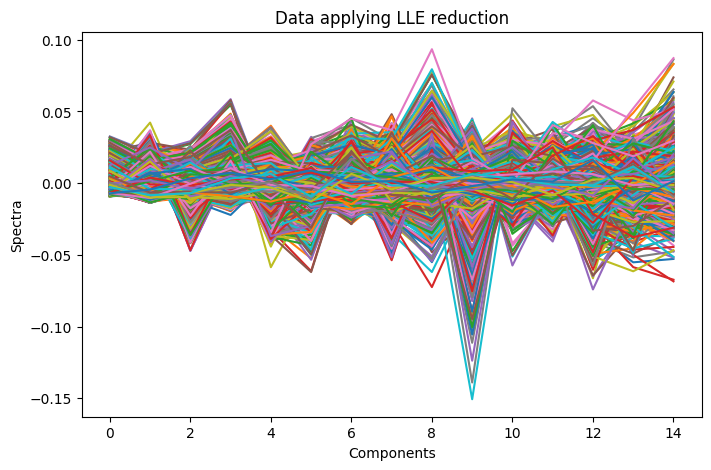

In [22]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Components")
plt.ylabel("Spectra")
plt.plot(lle_transformed_data_t)
plt.show()

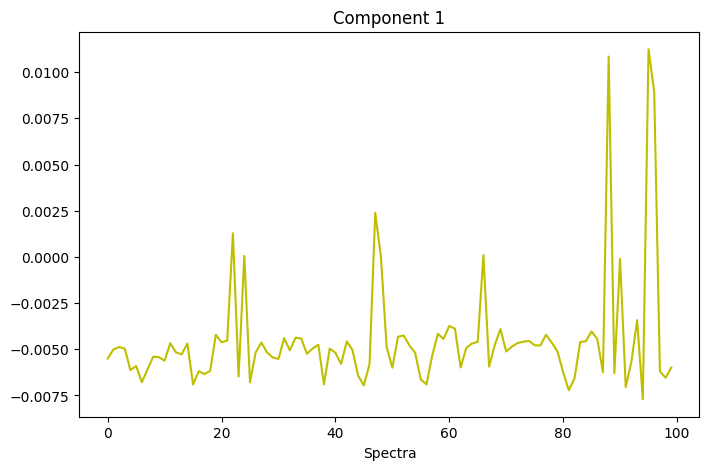

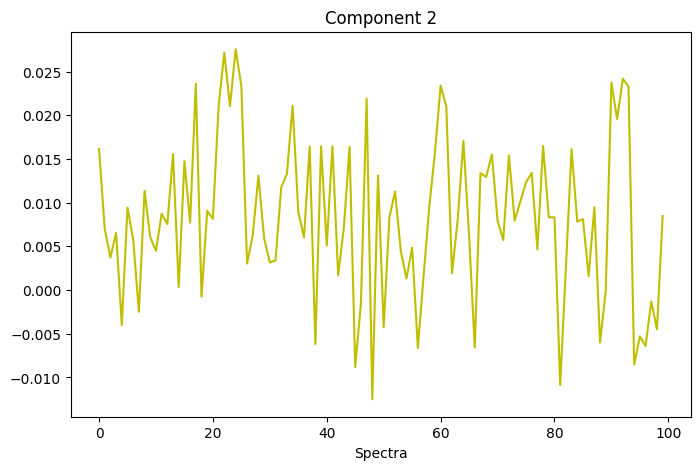

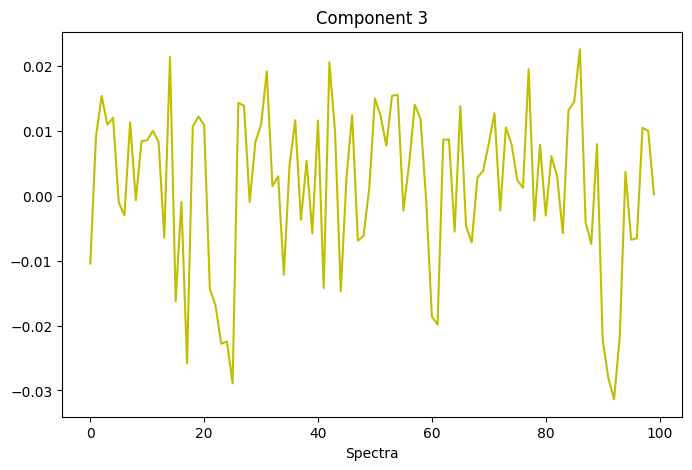

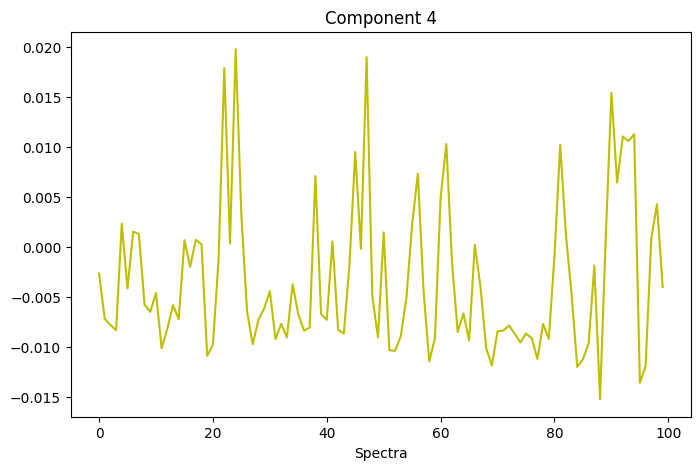

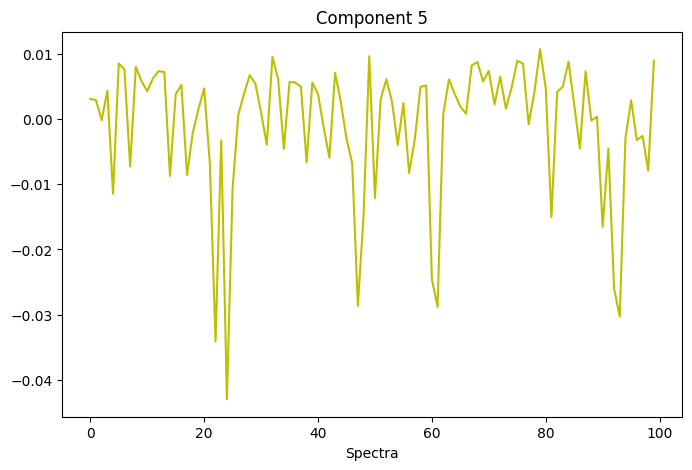

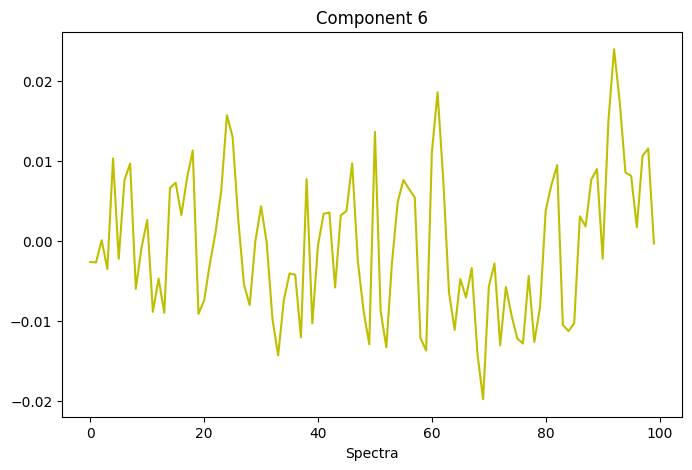

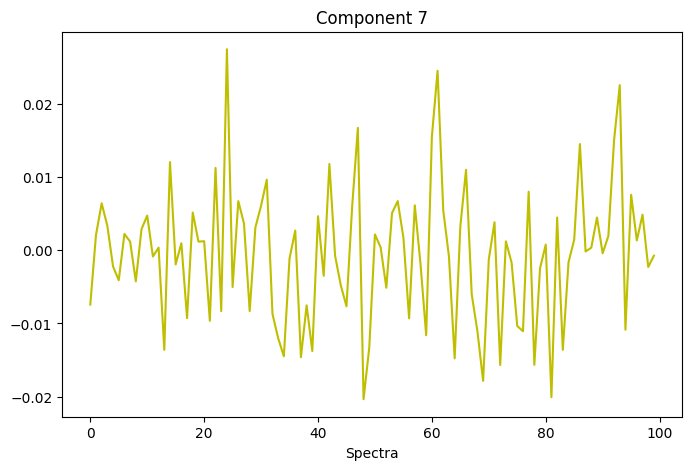

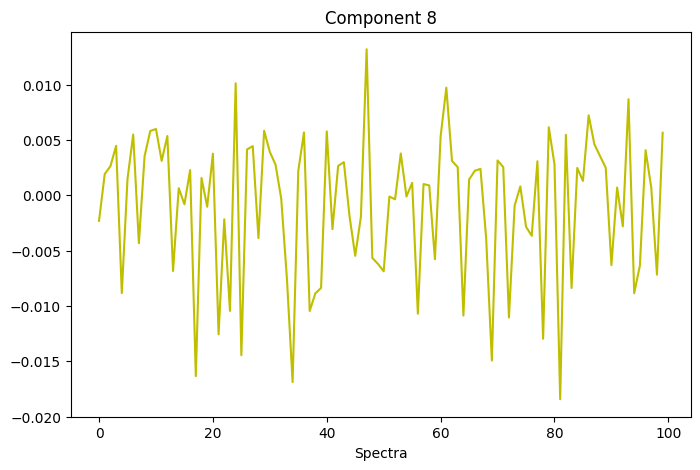

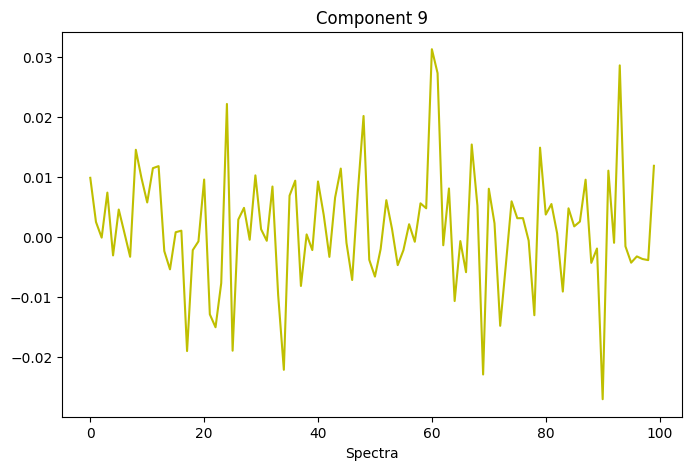

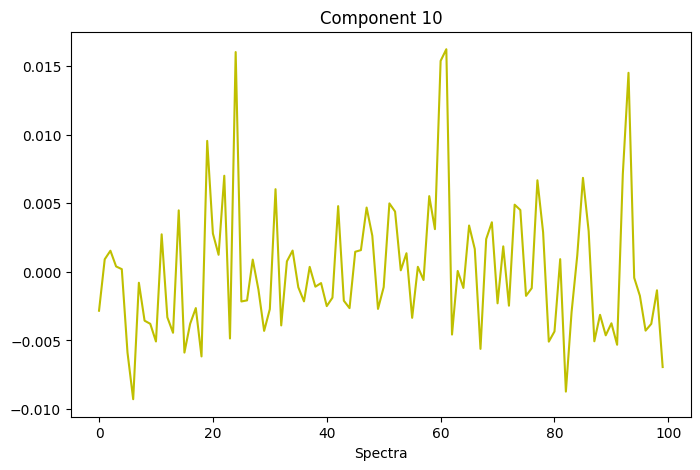

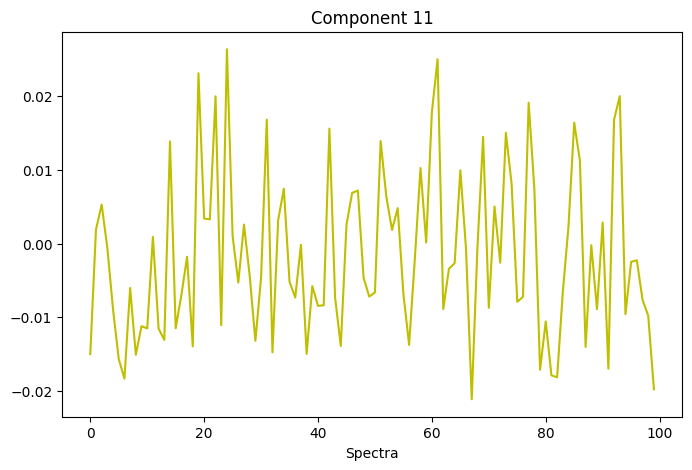

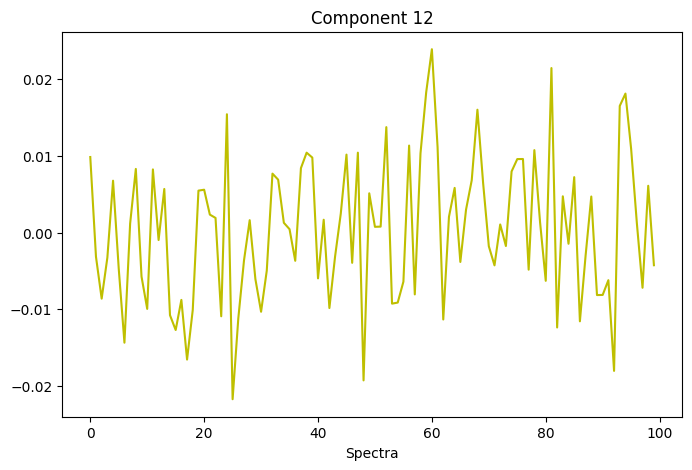

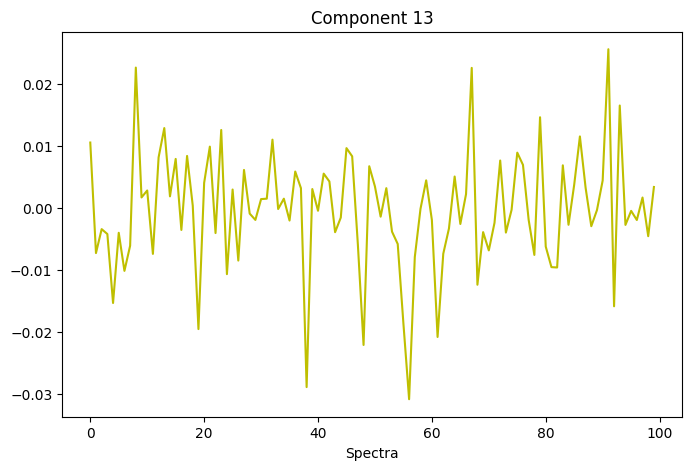

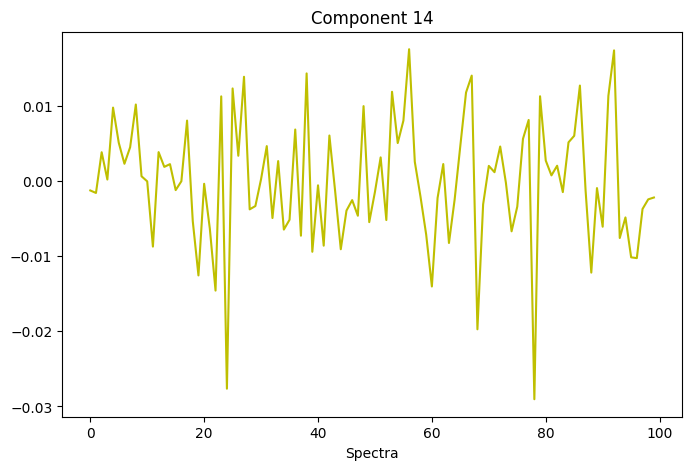

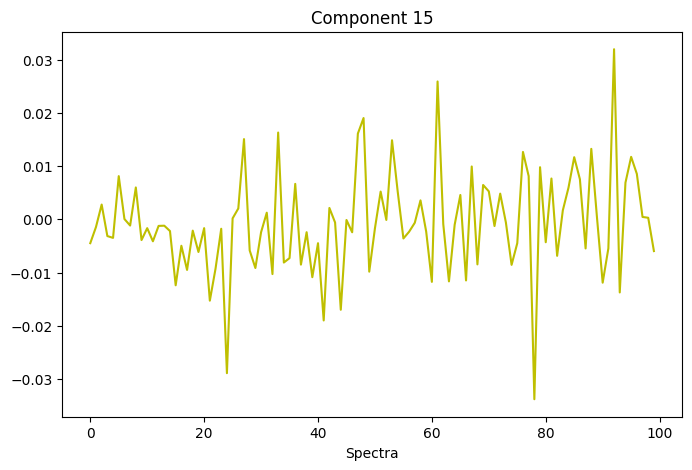

In [23]:
for i in range(1,16):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Spectra")
    plt.plot(lle_transformed_data.iloc[:100, i-1:i], '-',markersize=1, color = "y")
    plt.show()

In [24]:
# Perform HLLE on the data
#for method hessian, n_neighbours must be a greater than [n_components * (n_components +3) /2 ]
hlle = LocallyLinearEmbedding(n_components=15, n_neighbors=140, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [25]:
hlle_transformed_data

0         1         2         3         4         5         6   \
0      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
1      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
2      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
3      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
4      0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
...         ...       ...       ...       ...       ...       ...       ...   
12116  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12117  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12118  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12119  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   
12120  0.000033  0.000757 -0.000022 -0.000213  0.000701  0.000007  0.000844   

             7         8         9        10        11            12  \
0     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
1     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
2     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
3     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
4     -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
...         ...       ...       ...      ...       ...           ...   
12116 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12117 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12118 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12119 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   
12120 -0.000661 -0.000093  0.000199 -0.00135 -0.000028  1.346764e-08   

             13       14  
0     -0.000191 -0.00016  
1     -0.000191 -0.00016  
2     -0.000191 -0.00016  
3     -0.000191 -0.00016  
4     -0.000191 -0.00016  
...         ...      ...  
12116 -0.000191 -0.00016  
12117 -0.000191 -0.00016  
12118 -0.000191 -0.00016  
12119 -0.000191 -0.00016  
12120 -0.000191 -0.00016  

[12121 rows x 15 columns]

In [26]:
hlle_transformed_data_t = hlle_transformed_data.T

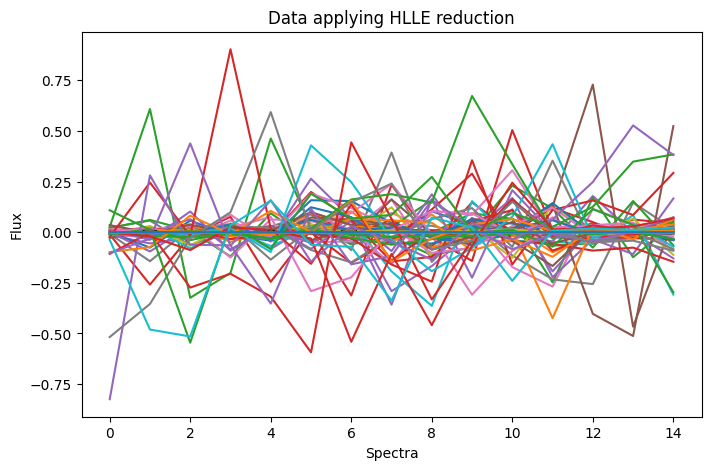

In [27]:
plt.figure(figsize=(8,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(hlle_transformed_data_t)
plt.show()

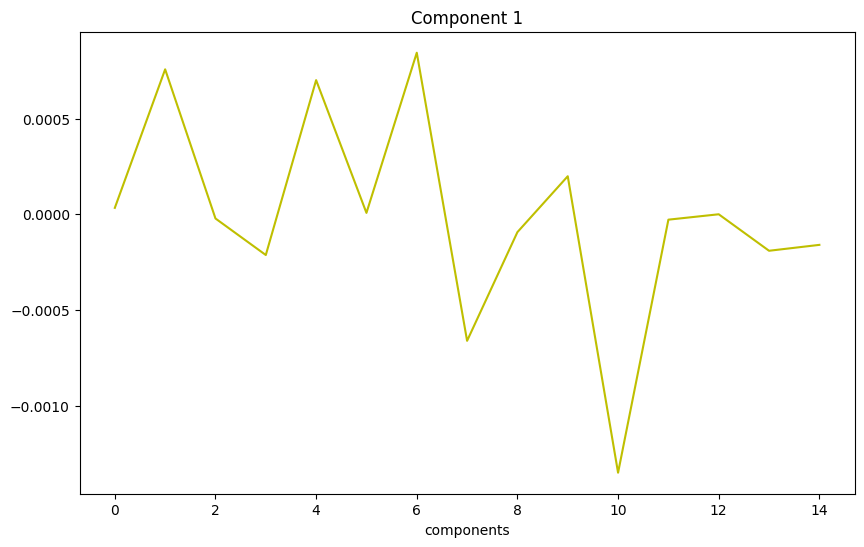

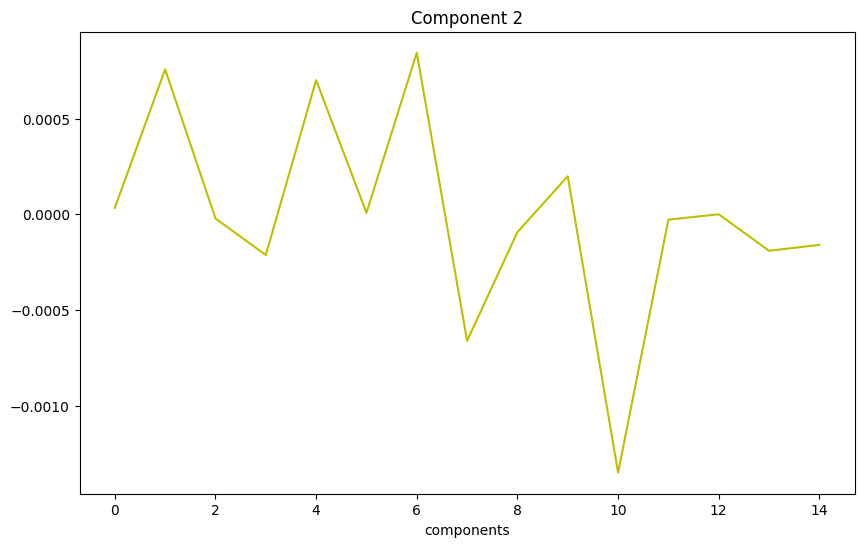

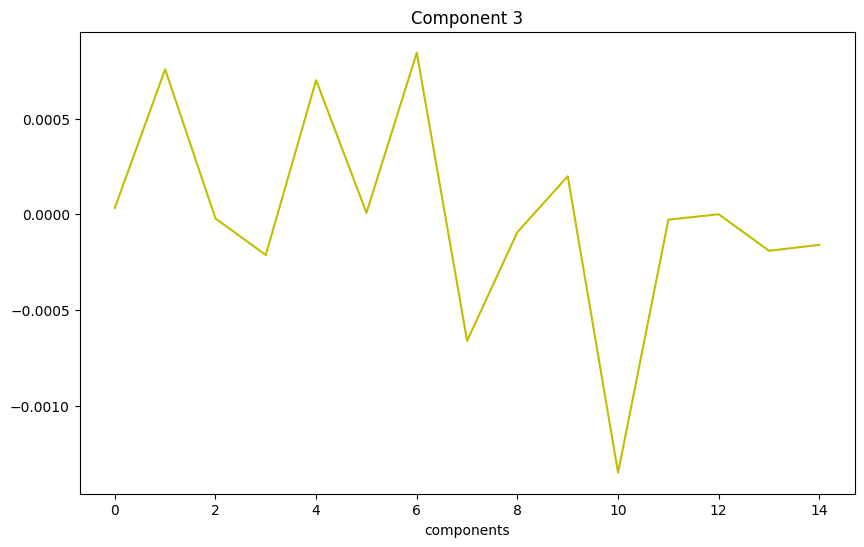

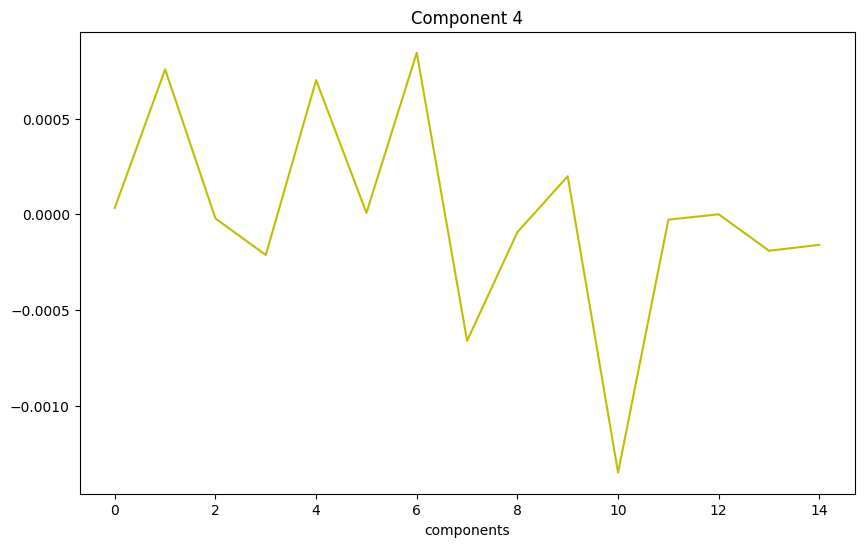

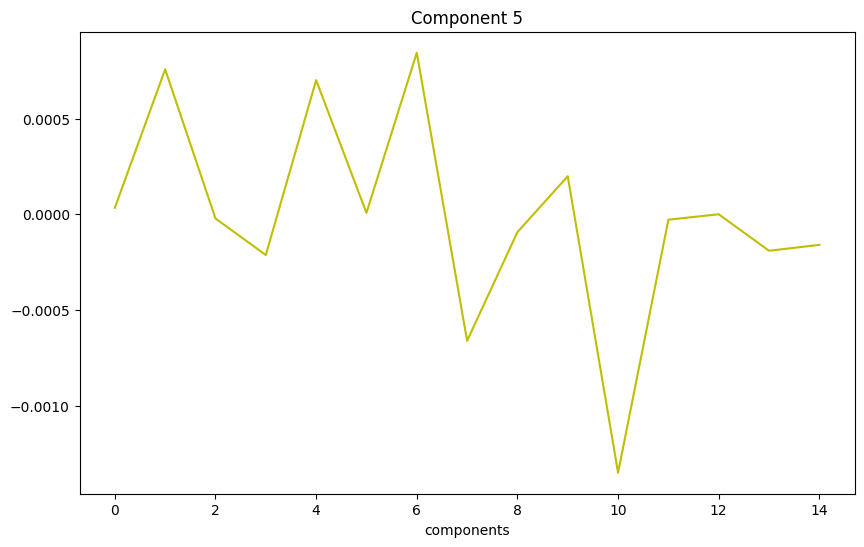

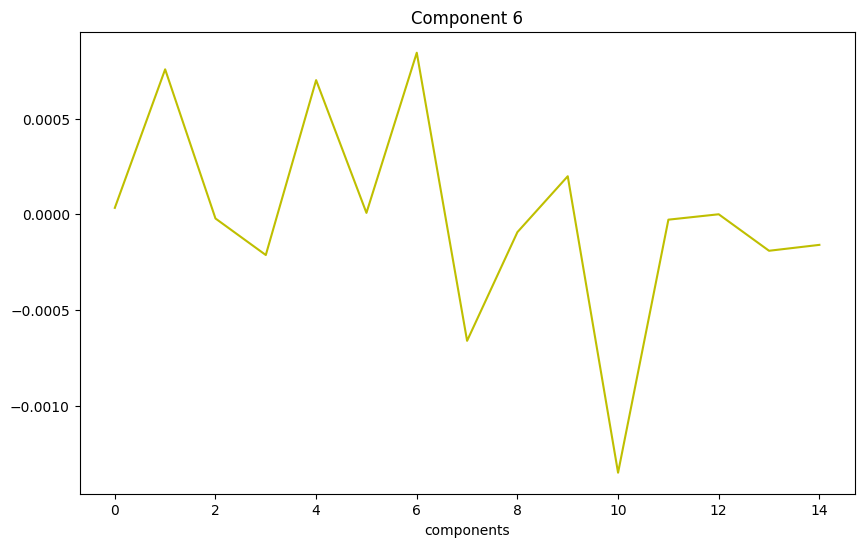

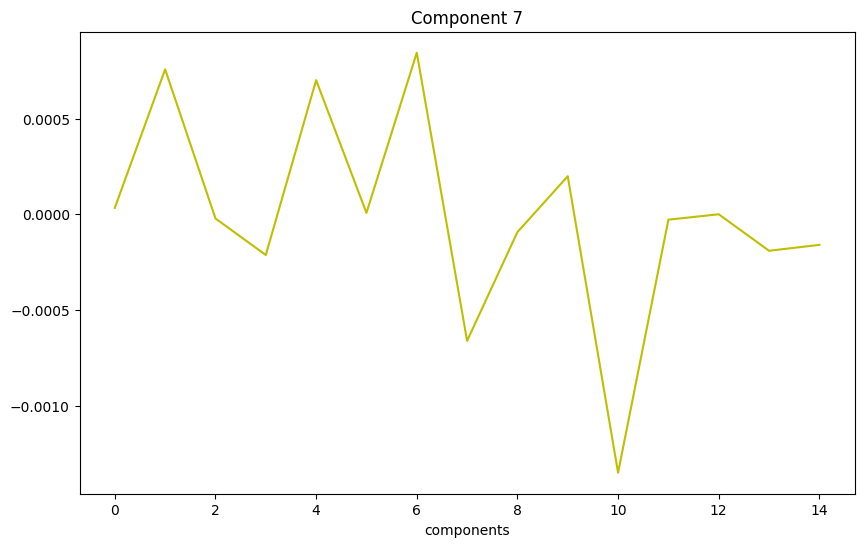

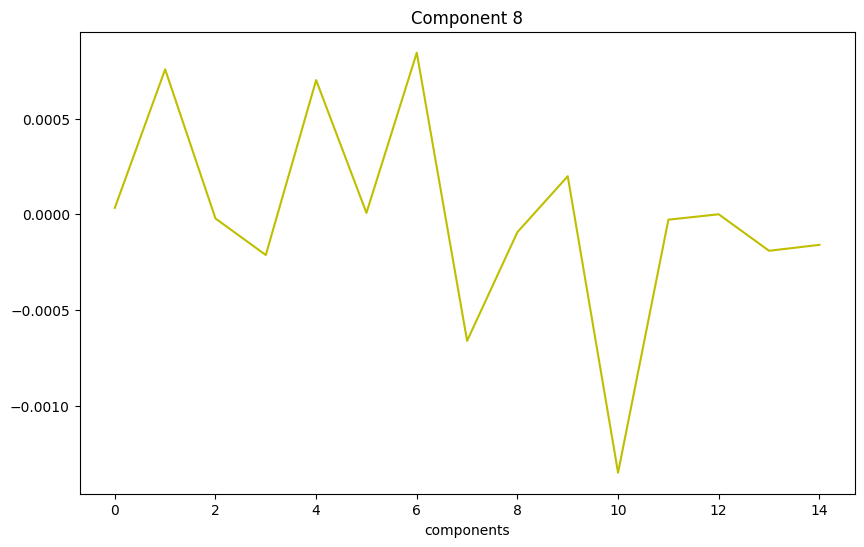

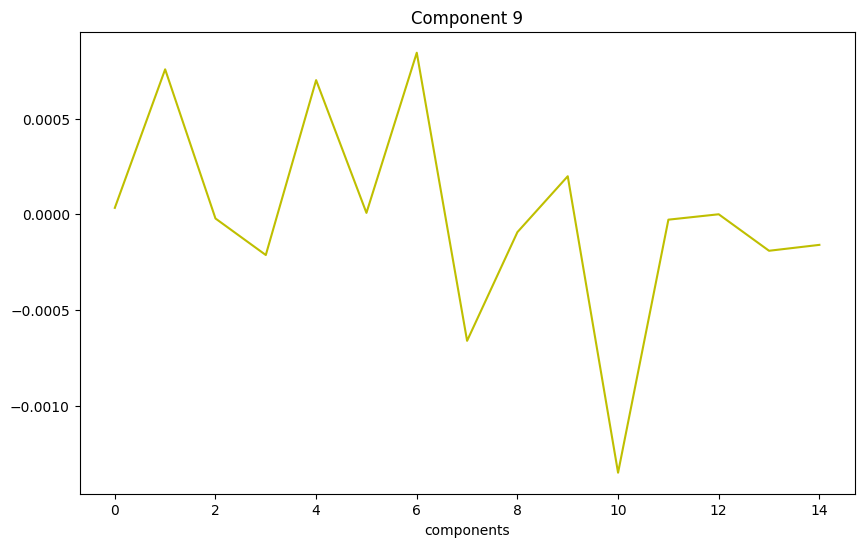

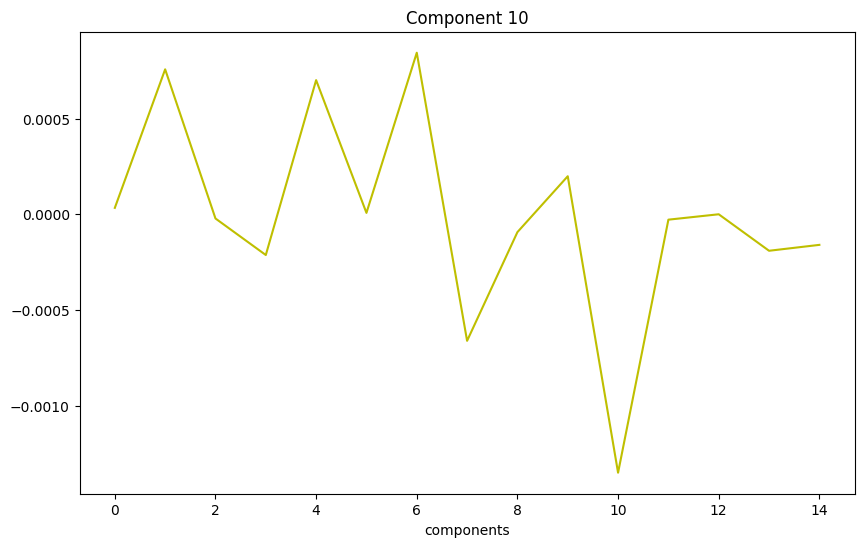

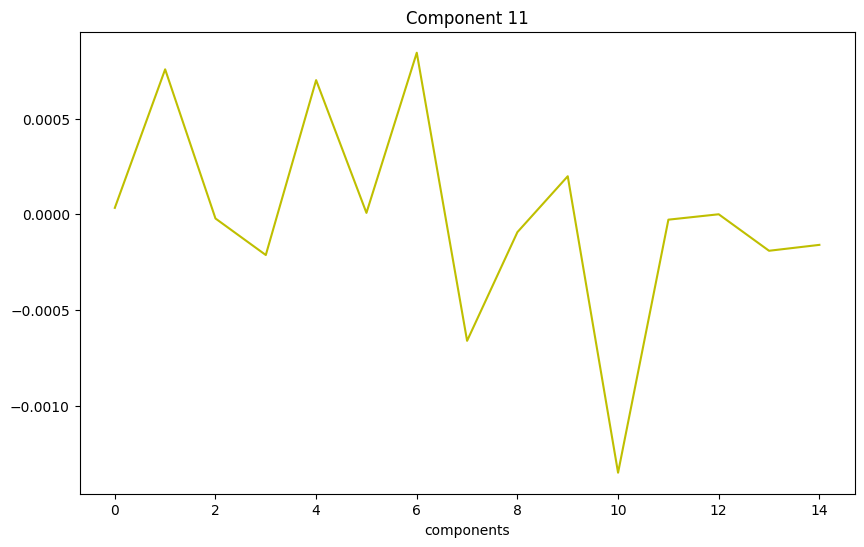

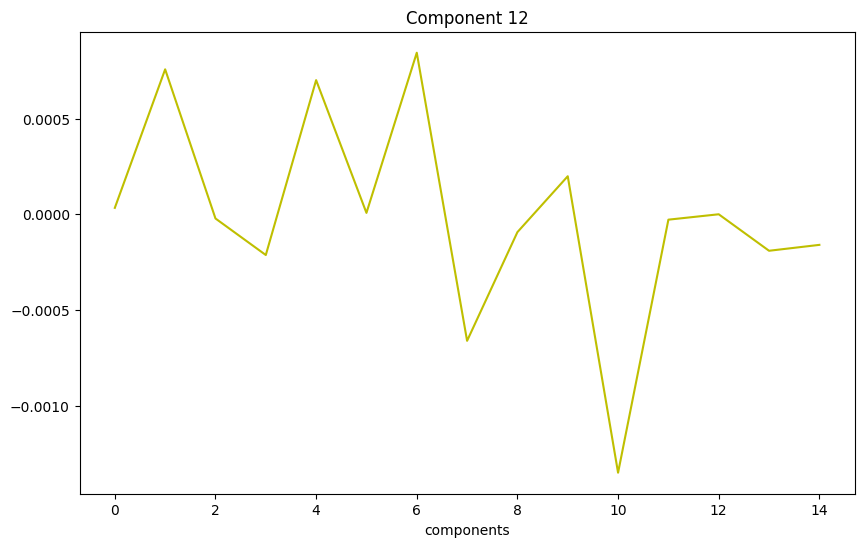

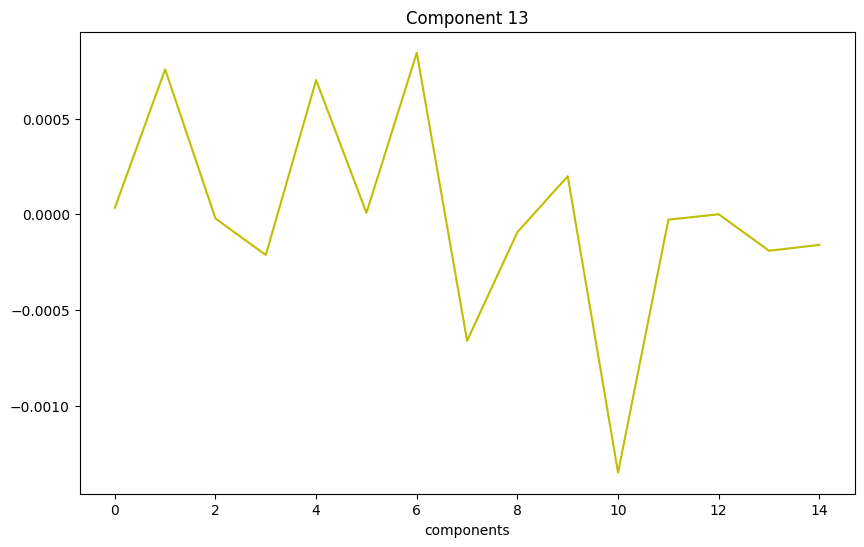

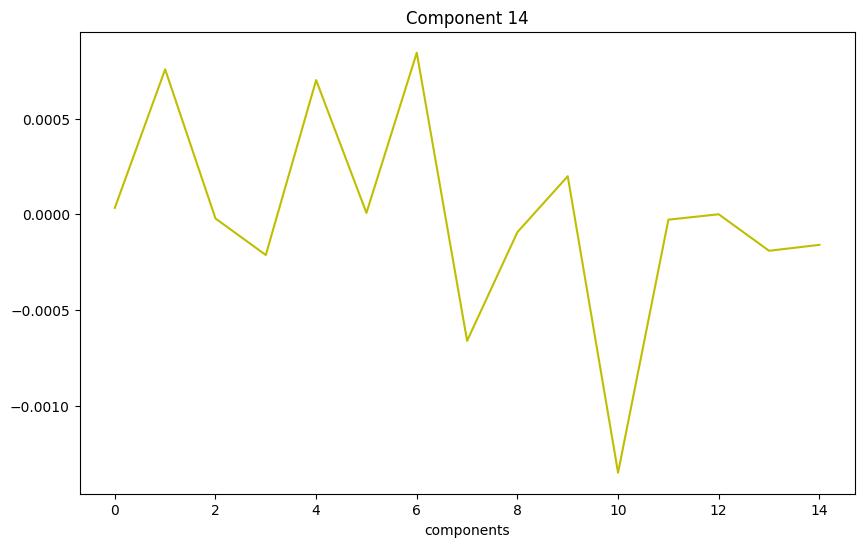

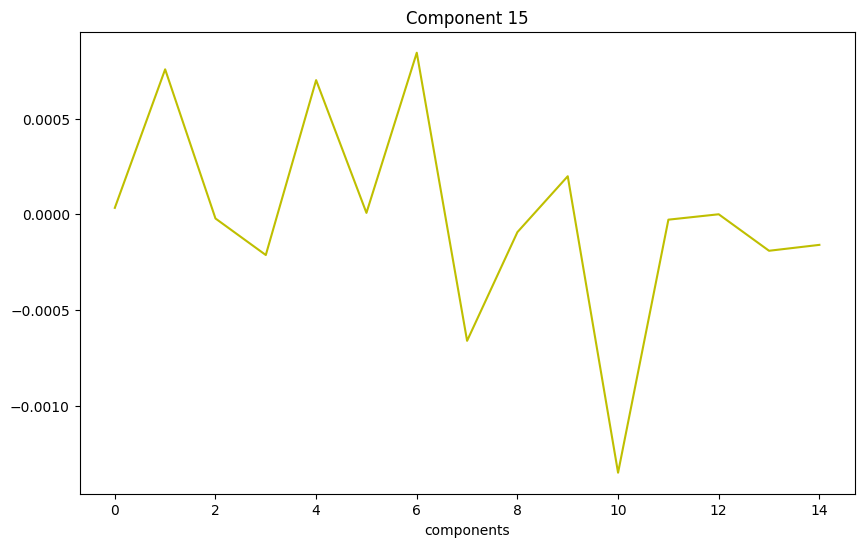

In [28]:
for i in range(1,16):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i}")
    plt.xlabel("components")
    plt.plot(hlle_transformed_data_t.iloc[:, i-1:i], '-',markersize=1, color = "y")
    plt.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_6488\843787051.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


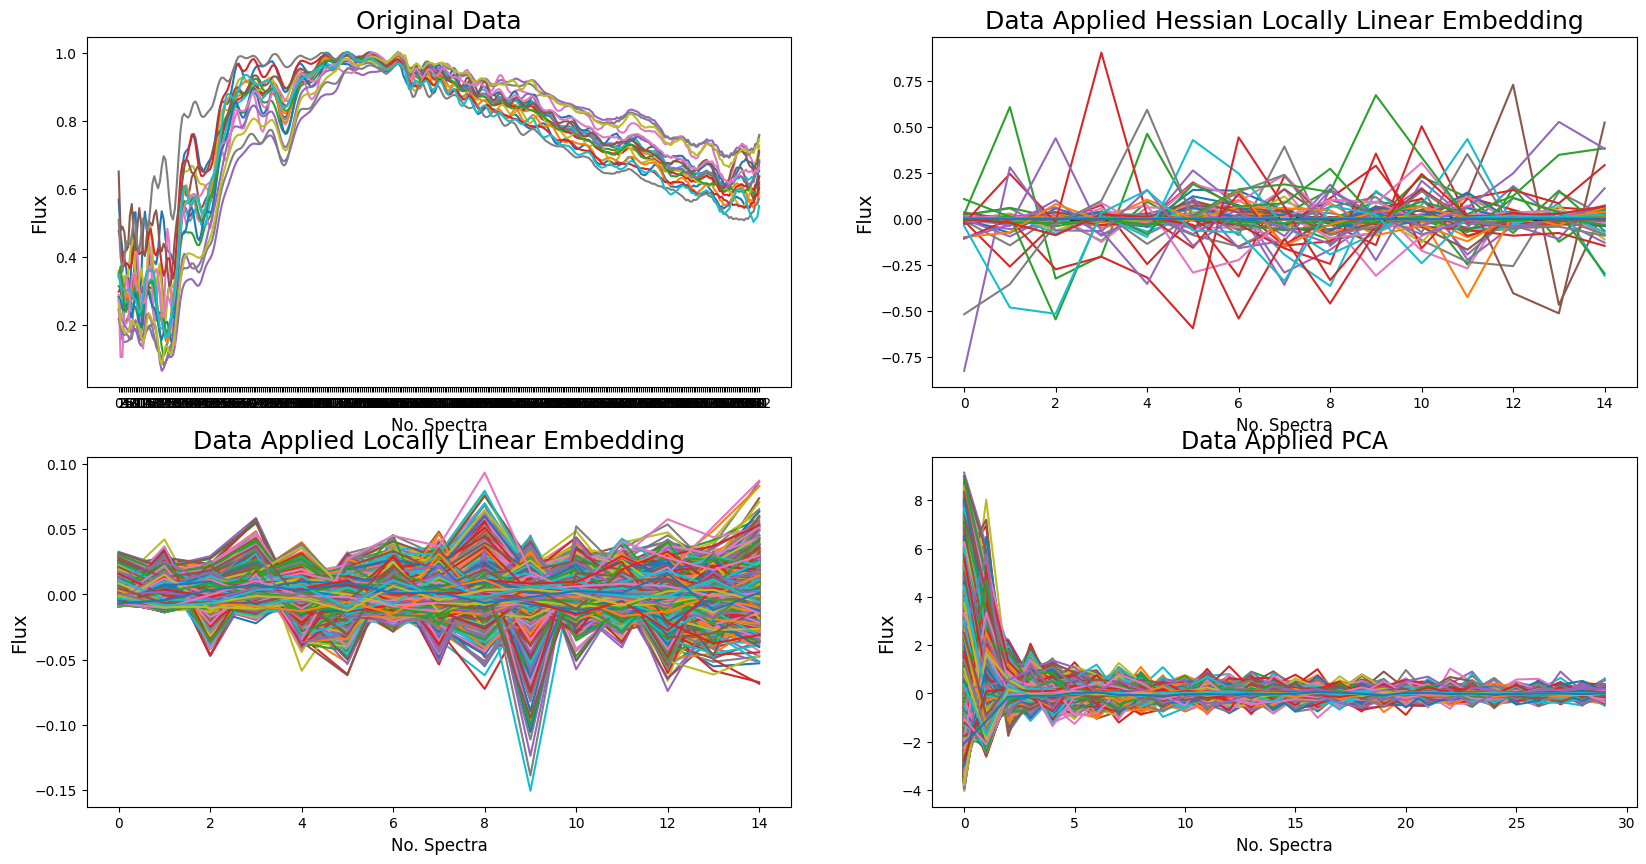

In [29]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:20])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data_t)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data_t)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data_t)

fig.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_23428\3897460035.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


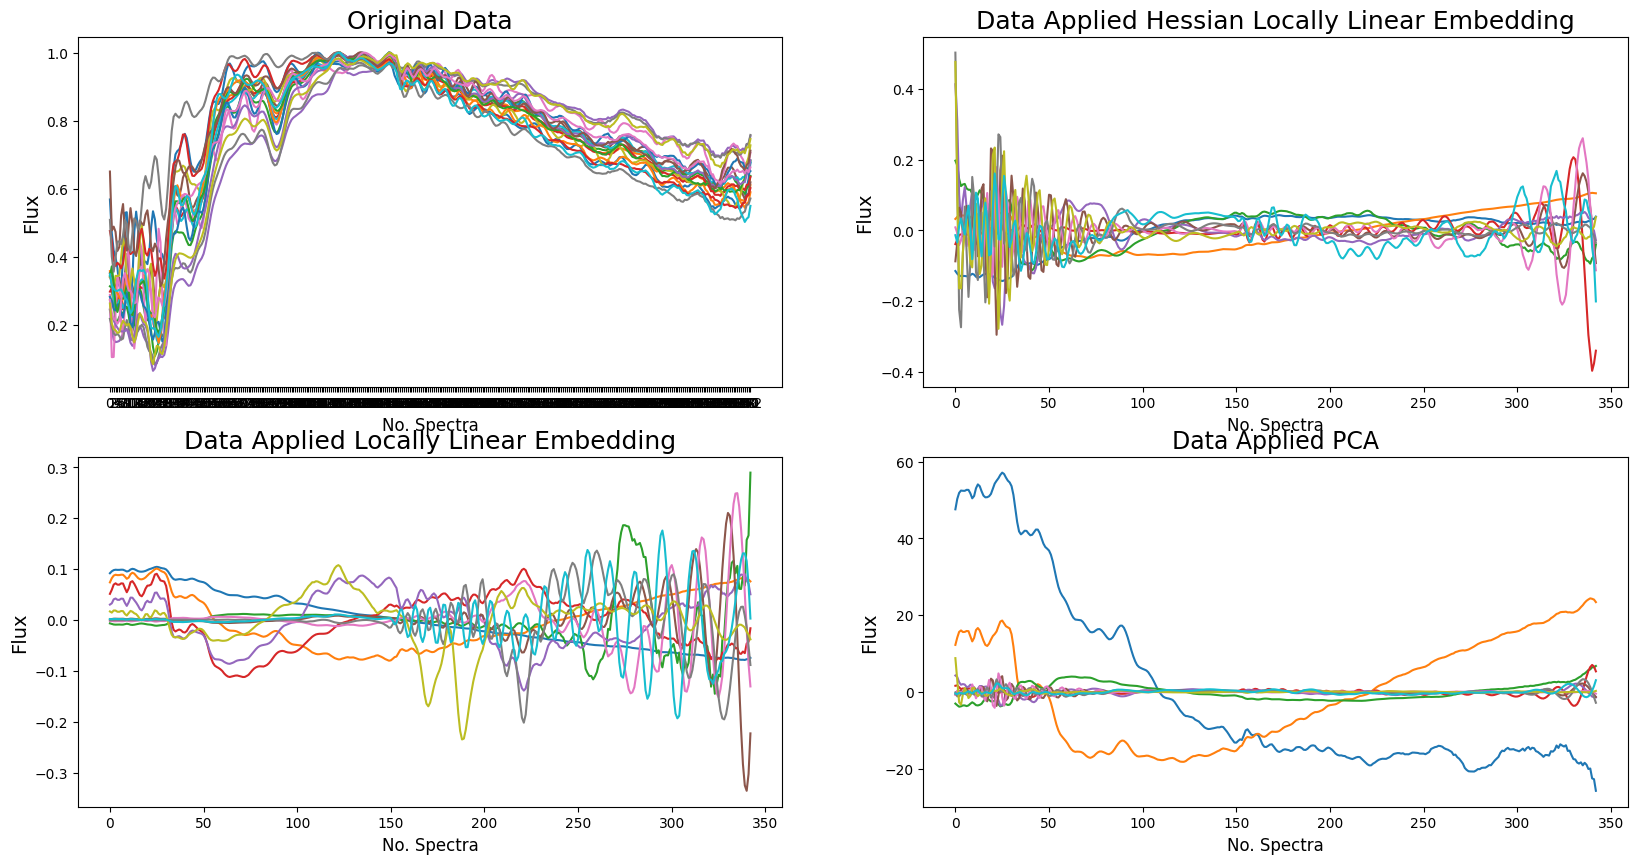

In [46]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:20])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data)

fig.show()

In [35]:
lle_transformed_data.to_csv("DATA_LLE_RG.csv", index=False)

In [36]:
hlle_transformed_data.to_csv("DATA_HESSIAN_NP.csv", index=False)

In [37]:
pca_transformed_data.to_csv("DATA_PCA.csv", index=False)

In [33]:
joblib.dump(pca_transformed_data, 'modelo_pca_RG.pkl') # Guardo el modelo.

['modelo_pca_RG.pkl']

In [34]:
joblib.dump(hlle_transformed_data, 'modelo_hlle_RG.pkl') # Guardo el modelo.

['modelo_hlle_RG.pkl']

In [35]:
joblib.dump(lle_transformed_data, 'modelo_lle_RG.pkl') # Guardo el modelo.

['modelo_lle_RG.pkl']